In [2]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [16]:
# Get images
image = img_to_array(load_img('data/01_002.jpg'))
image = np.array(image, dtype=float)

In [17]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [5]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [6]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [7]:
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.0857
Epoch 2/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.3761
Epoch 3/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0943
Epoch 4/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0604
Epoch 5/1000
1/1 [==============================] - 0s 13ms/step - loss: 0.0386
Epoch 6/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0083
Epoch 7/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0065
Epoch 8/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0060
Epoch 9/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0058
Epoch 10/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0056
Epoch 11/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0054
Epoch 12/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0053
Epoch 13/1000
1/1 [====================

Epoch 103/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0021
Epoch 104/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 105/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0019
Epoch 106/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0024
Epoch 107/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0031
Epoch 108/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0032
Epoch 109/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0025
Epoch 110/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0019
Epoch 111/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0017
Epoch 112/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0017
Epoch 113/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 114/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0026
Epoch 115/1000
1

Epoch 203/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0012
Epoch 204/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 205/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0013
Epoch 206/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 207/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0020
Epoch 208/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0019
Epoch 209/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 210/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 211/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0020
Epoch 212/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0016
Epoch 213/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 214/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0012
Epoch 215/1000
1

1/1 [==============================] - 0s 17ms/step - loss: 9.9393e-04
Epoch 303/1000
1/1 [==============================] - 0s 15ms/step - loss: 8.9934e-04
Epoch 304/1000
1/1 [==============================] - 0s 15ms/step - loss: 8.2922e-04
Epoch 305/1000
1/1 [==============================] - 0s 16ms/step - loss: 8.0927e-04
Epoch 306/1000
1/1 [==============================] - 0s 15ms/step - loss: 8.5648e-04
Epoch 307/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0011
Epoch 308/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0014
Epoch 309/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0010
Epoch 310/1000
1/1 [==============================] - 0s 16ms/step - loss: 8.5883e-04
Epoch 311/1000
1/1 [==============================] - 0s 15ms/step - loss: 9.5678e-04
Epoch 312/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015
Epoch 313/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0024
Epo

1/1 [==============================] - 0s 15ms/step - loss: 7.1892e-04
Epoch 400/1000
1/1 [==============================] - 0s 16ms/step - loss: 8.0473e-04
Epoch 401/1000
1/1 [==============================] - 0s 16ms/step - loss: 7.5321e-04
Epoch 402/1000
1/1 [==============================] - 0s 15ms/step - loss: 9.0591e-04
Epoch 403/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0010
Epoch 404/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0013
Epoch 405/1000
1/1 [==============================] - 0s 19ms/step - loss: 0.0023
Epoch 406/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0014
Epoch 407/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0014
Epoch 408/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0012
Epoch 409/1000
1/1 [==============================] - 0s 16ms/step - loss: 7.6474e-04
Epoch 410/1000
1/1 [==============================] - 0s 16ms/step - loss: 6.4996e-04
Epoch 4

Epoch 496/1000
1/1 [==============================] - 0s 15ms/step - loss: 7.7375e-04
Epoch 497/1000
1/1 [==============================] - 0s 14ms/step - loss: 8.4706e-04
Epoch 498/1000
1/1 [==============================] - 0s 15ms/step - loss: 8.4023e-04
Epoch 499/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.7256e-04
Epoch 500/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.2307e-04
Epoch 501/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.1366e-04
Epoch 502/1000
1/1 [==============================] - 0s 17ms/step - loss: 5.4834e-04
Epoch 503/1000
1/1 [==============================] - 0s 20ms/step - loss: 7.9371e-04
Epoch 504/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0011
Epoch 505/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0016
Epoch 506/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0016
Epoch 507/1000
1/1 [==============================] - 0s 15ms/step

Epoch 592/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0010
Epoch 593/1000
1/1 [==============================] - 0s 15ms/step - loss: 8.8622e-04
Epoch 594/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.5952e-04
Epoch 595/1000
1/1 [==============================] - 0s 20ms/step - loss: 4.6417e-04
Epoch 596/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.5634e-04
Epoch 597/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.3376e-04
Epoch 598/1000
1/1 [==============================] - 0s 18ms/step - loss: 4.5247e-04
Epoch 599/1000
1/1 [==============================] - 0s 18ms/step - loss: 4.3272e-04
Epoch 600/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.5257e-04
Epoch 601/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.4232e-04
Epoch 602/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.8969e-04
Epoch 603/1000
1/1 [==============================] - 0s 1

Epoch 688/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.1035e-04
Epoch 689/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.4361e-04
Epoch 690/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.9493e-04
Epoch 691/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.1926e-04
Epoch 692/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.9137e-04
Epoch 693/1000
1/1 [==============================] - 0s 15ms/step - loss: 7.2982e-04
Epoch 694/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0014
Epoch 695/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0015
Epoch 696/1000
1/1 [==============================] - 0s 15ms/step - loss: 7.7058e-04
Epoch 697/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.6462e-04
Epoch 698/1000
1/1 [==============================] - 0s 13ms/step - loss: 4.4390e-04
Epoch 699/1000
1/1 [==============================] - 0s 15ms/

Epoch 784/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.0911e-04
Epoch 785/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.3744e-04
Epoch 786/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.2075e-04
Epoch 787/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.1311e-04
Epoch 788/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.0959e-04
Epoch 789/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.1078e-04
Epoch 790/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.1898e-04
Epoch 791/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.5455e-04
Epoch 792/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.4304e-04
Epoch 793/1000
1/1 [==============================] - 0s 16ms/step - loss: 6.8860e-04
Epoch 794/1000
1/1 [==============================] - 0s 18ms/step - loss: 7.9046e-04
Epoch 795/1000
1/1 [==============================] - 

Epoch 880/1000
1/1 [==============================] - 0s 16ms/step - loss: 7.2765e-04
Epoch 881/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.9080e-04
Epoch 882/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.3274e-04
Epoch 883/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.2574e-04
Epoch 884/1000
1/1 [==============================] - 0s 20ms/step - loss: 3.0694e-04
Epoch 885/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.9896e-04
Epoch 886/1000
1/1 [==============================] - 0s 17ms/step - loss: 2.9934e-04
Epoch 887/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.0491e-04
Epoch 888/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.2552e-04
Epoch 889/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.5744e-04
Epoch 890/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.2621e-04
Epoch 891/1000
1/1 [==============================] - 

Epoch 976/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.7714e-04
Epoch 977/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.4422e-04
Epoch 978/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.7069e-04
Epoch 979/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.7932e-04
Epoch 980/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.6027e-04
Epoch 981/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.3357e-04
Epoch 982/1000
1/1 [==============================] - 0s 17ms/step - loss: 4.1086e-04
Epoch 983/1000
1/1 [==============================] - 0s 18ms/step - loss: 3.3725e-04
Epoch 984/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.0207e-04
Epoch 985/1000
1/1 [==============================] - 0s 16ms/step - loss: 2.8834e-04
Epoch 986/1000
1/1 [==============================] - 0s 18ms/step - loss: 2.9838e-04
Epoch 987/1000
1/1 [==============================] - 

1/1 [==============================] - 0s 33ms/step
0.0007059873314574361


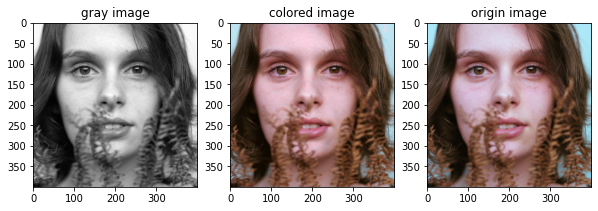

In [19]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1,3,1)
plt.title('gray image')
plt.imshow(rgb2gray(lab2rgb(cur)), cmap='gray')
plt.subplot(1,3,2)
plt.title('colored image')
plt.imshow(lab2rgb(cur))
plt.subplot(1,3,3)
plt.title('origin image')
plt.imshow(load_img('data/01_002.jpg'))

In [20]:
image = img_to_array(load_img('data/01_001.jpg'))
image = np.array(image, dtype=float)
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

1/1 [==============================] - 0s 21ms/step
0.004854933358728886


/usr/local/miniconda3/envs/dl/lib/python3.6/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 70 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


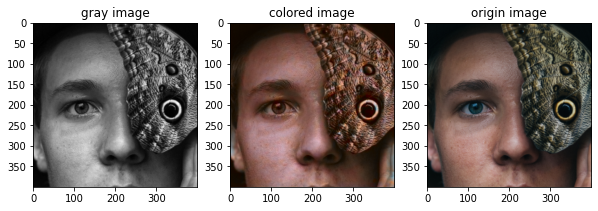

In [21]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1,3,1)
plt.title('gray image')
plt.imshow(rgb2gray(lab2rgb(cur)), cmap='gray')
plt.subplot(1,3,2)
plt.title('colored image')
plt.imshow(lab2rgb(cur))
plt.subplot(1,3,3)
plt.title('origin image')
plt.imshow(load_img('data/01_001.jpg'))